In [318]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [319]:
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [320]:
df.shape

(5110, 12)

In [321]:
# df.drop(['id'],axis='columns')
df.drop(['id'],axis='columns',inplace=True)
df.drop(['ever_married'],axis='columns',inplace=True)
df.drop(['Residence_type'],axis='columns',inplace=True)
df.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,174.12,24.0,never smoked,1


In [322]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [323]:
df['bmi'].dtype

dtype('float64')

In [324]:
df['bmi'].fillna(float(df['bmi'].mean()), inplace = True)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [325]:
temp = random.randint(40,45, size=5110)
temperature = temp
df["temperature"] = temp
df.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,temperature
0,Male,67.0,0,1,Private,228.69,36.600000,formerly smoked,1,42
1,Female,61.0,0,0,Self-employed,202.21,28.893237,never smoked,1,40
2,Male,80.0,0,1,Private,105.92,32.500000,never smoked,1,40
3,Female,49.0,0,0,Private,171.23,34.400000,smokes,1,42
4,Female,79.0,1,0,Self-employed,174.12,24.000000,never smoked,1,40


In [326]:
pulse = random.randint(60,160, size = 5110)
df['pulse_rate'] = pulse
df.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,temperature,pulse_rate
0,Male,67.0,0,1,Private,228.69,36.600000,formerly smoked,1,42,159
1,Female,61.0,0,0,Self-employed,202.21,28.893237,never smoked,1,40,115
2,Male,80.0,0,1,Private,105.92,32.500000,never smoked,1,40,94
3,Female,49.0,0,0,Private,171.23,34.400000,smokes,1,42,143
4,Female,79.0,1,0,Self-employed,174.12,24.000000,never smoked,1,40,67


In [327]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

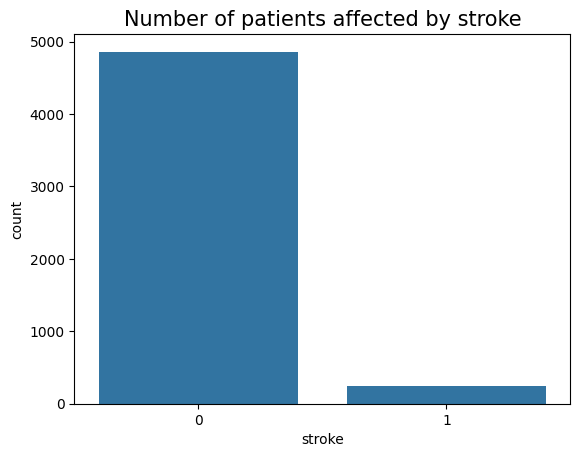

In [328]:
sns.countplot(x = df['stroke'])
plt.title('Number of patients affected by stroke', fontsize = 15)
plt.show()

In [329]:
df.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

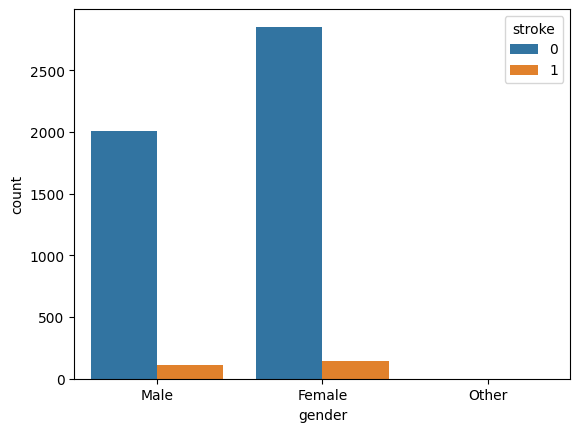

In [330]:
sns.countplot(x = df['gender'], hue = df['stroke'])
plt.show()

In [331]:
df=pd.get_dummies(df,["gender","work_type","smoking_status"])
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,temperature,pulse_rate,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,42,159,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,40,115,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,40,94,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,42,143,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,40,67,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
# df.drop('gender_Female',axis=1,inplace=True)
# df.drop('Work_Type_children',axis=1,inplace=True)
# df.drop('Smoking_Status_smokes',axis=1,inplace=True)
# df.head()

In [111]:
# from sklearn.preprocessing import LabelEncoder
# labelEncoder = LabelEncoder()
# df['gender'] = labelEncoder.fit_transform(df['gender'])
# df['ever_married'] = labelEncoder.fit_transform(df['ever_married'])
# df['work_type'] = labelEncoder.fit_transform(df['work_type'])
# df['Residence_type'] = labelEncoder.fit_transform(df['Residence_type'])
# df['smoking_status'] = labelEncoder.fit_transform(df['smoking_status'])

In [332]:
model=DecisionTreeClassifier()
# X = df[['age','hypertension','heart_disease','bmi','avg_glucose_level','gender_Female','gender_Male','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','work_type_children','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]
X = df[['temperature','pulse_rate']]
Y = df['stroke']

In [333]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=14)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy score is ",accuracy_score(y_pred,y_test))
print("precision score is ",precision_score(y_pred,y_test))
print("recall score is ",recall_score(y_pred,y_test))
print("f1 score is ",f1_score(y_pred,y_test))

accuracy score is  0.9540117416829745
precision score is  0.0
recall score is  0.0
f1 score is  0.0


In [334]:
# pulse_rate = int(input("Enter pulse rate"))
# temperature = int(input("Enter temperature"))
# test = [[temperature,pulse_rate]]
# prediction = model.predict(test)
# if (pulse_rate>160 or pulse_rate<60) and (temperature<40 or temperature>45):
#     print(1)
# prediction

In [336]:
# @title Input Features
pulse_rate = 78 # @param {type:"integer"}
temperature = 43 # @param {type:"integer"}
test = [[temperature,pulse_rate]]
prediction = model.predict(test)
if (pulse_rate>160 or pulse_rate<60) and (temperature<40 or temperature>45):
    print(1)
prediction


array([0])

1 - Person gets a stroke

0 - Person doesn't gets a stroke